In [48]:
import pandas as pd

# 1. Chargement du dataset à partir du fichier CSV
df = pd.read_csv('orders_details.csv')

# 2. Aperçu des 5 premières lignes du dataset complet
print("--- Aperçu du Dataset Brut ---")
display(df.head())

# 3. Sélection des variables stratégiques pour l'analyse
# On se concentre sur les facteurs de retard et la satisfaction client
cols_interessantes = ['distance_km', 'delivery_status_y', 'order_total']

print("\n--- Aperçu des colonnes clés (Features) ---")
display(df[cols_interessantes].head())

--- Aperçu du Dataset Brut ---


,Unnamed: 0,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status_x,order_total,payment_method,number_product,...,registration_date,customer_segment,total_orders,avg_order_value,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status_y
0,0,2850500678,97145527,2024-03-29 01:27:15,2024-03-29 01:46:15,2024-03-29 01:59:15,Slightly Delayed,4817.54,Cash,6,...,2023-08-27,Premium,11,1298.98,32423,2024-03-29 01:46:15,2024-03-29 01:59:15,13.0,4.84,Slightly Delayed
1,1,7171106490,45835229,2023-08-17 15:46:27,2023-08-17 15:59:27,2023-08-17 15:57:27,On Time,922.44,Cash,1,...,2025-07-16,Regular,13,1691.43,2312,2023-08-17 15:59:27,2023-08-17 15:57:27,-2.0,1.49,On Time
2,2,3829771237,25578646,2023-11-23 23:46:22,2023-11-24 00:05:22,2023-11-24 00:08:22,On Time,4154.91,Cash,8,...,2024-09-25,Inactive,8,1662.66,87568,2023-11-24 00:05:22,2023-11-24 00:08:22,3.0,4.08,On Time
3,3,459643984,68711385,2025-07-17 17:33:23,2025-07-17 17:51:23,2025-07-17 17:52:23,On Time,2682.11,Wallet,5,...,2024-11-29,Regular,1,1615.63,96765,2025-07-17 17:51:23,2025-07-17 17:52:23,1.0,3.21,On Time
4,4,1316777473,52002897,2023-12-16 13:15:48,2023-12-16 13:34:48,2023-12-16 14:01:48,Significantly Delayed,1861.67,Cash,3,...,2023-10-04,New,17,456.76,43840,2023-12-16 13:34:48,2023-12-16 14:01:48,27.0,0.95,Significantly Delayed



--- Aperçu des colonnes clés (Features) ---


,distance_km,delivery_status_y,order_total
0,4.84,Slightly Delayed,4817.54
1,1.49,On Time,922.44
2,4.08,On Time,4154.91
3,3.21,On Time,2682.11
4,0.95,Significantly Delayed,1861.67


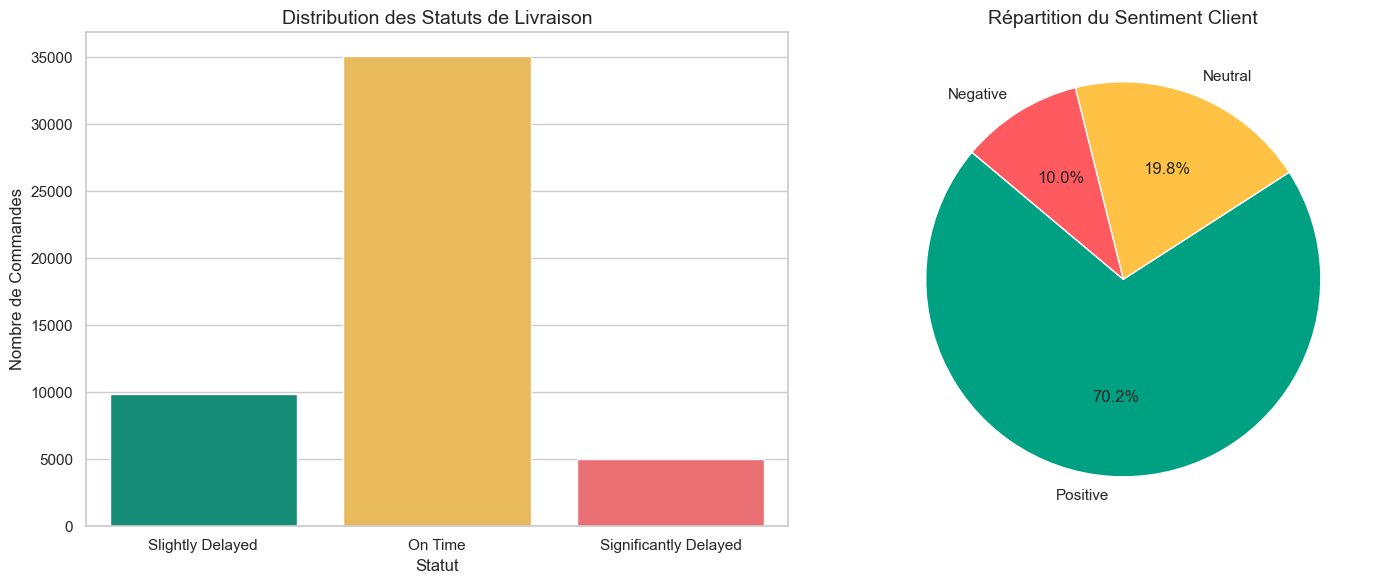

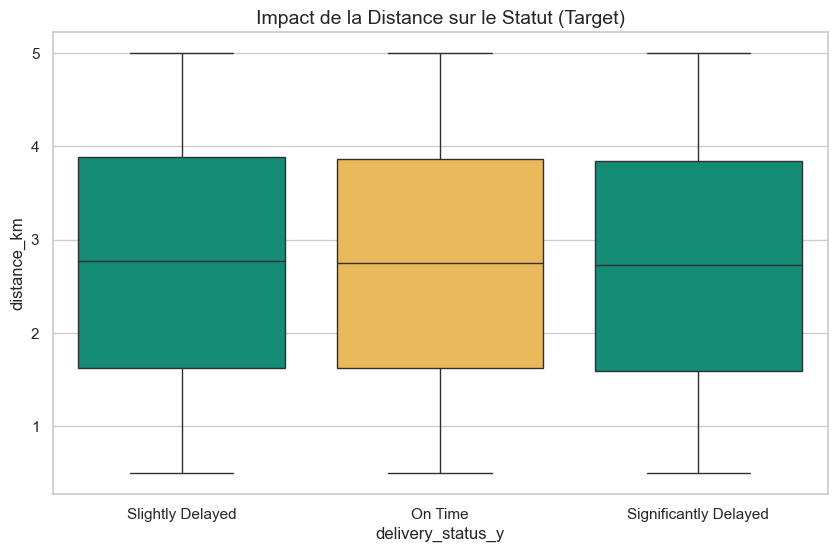

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Na77iw el warnings bech el prof ma ychouf chay mouch mrigel
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# --- Graphique 1 : Distribution du statut de livraison ---
plt.subplot(1, 2, 1)
# Nzidou hue= o legend=False bech nna77iw el warning
# Nzidou loun ekher (rouge) ken fama "Cancelled" walla status ekher
sns.countplot(x='delivery_status_y', data=df, hue='delivery_status_y',
              palette=['#00A082', '#FFC244', '#FF5A5F'], legend=False)
plt.title('Distribution des Statuts de Livraison', fontsize=14)
plt.xlabel('Statut')
plt.ylabel('Nombre de Commandes')

# --- Graphique 2 : Analyse du Sentiment Client ---
plt.subplot(1, 2, 2)
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%',
                                        colors=['#00A082', '#FFC244', '#FF5A5F'],
                                        startangle=140)
plt.title('Répartition du Sentiment Client', fontsize=14)
plt.ylabel('')

plt.tight_layout()
plt.show()

# --- Graphique 3 : Relation Distance vs Temps ---
plt.figure(figsize=(10, 6))
# Nchoufou ken el distance s7i7 t'atther 3al retard wala la
sns.boxplot(x='delivery_status_y', y='distance_km', data=df, palette=['#00A082', '#FFC244'])
plt.title('Impact de la Distance sur le Statut (Target)', fontsize=14)
plt.show()

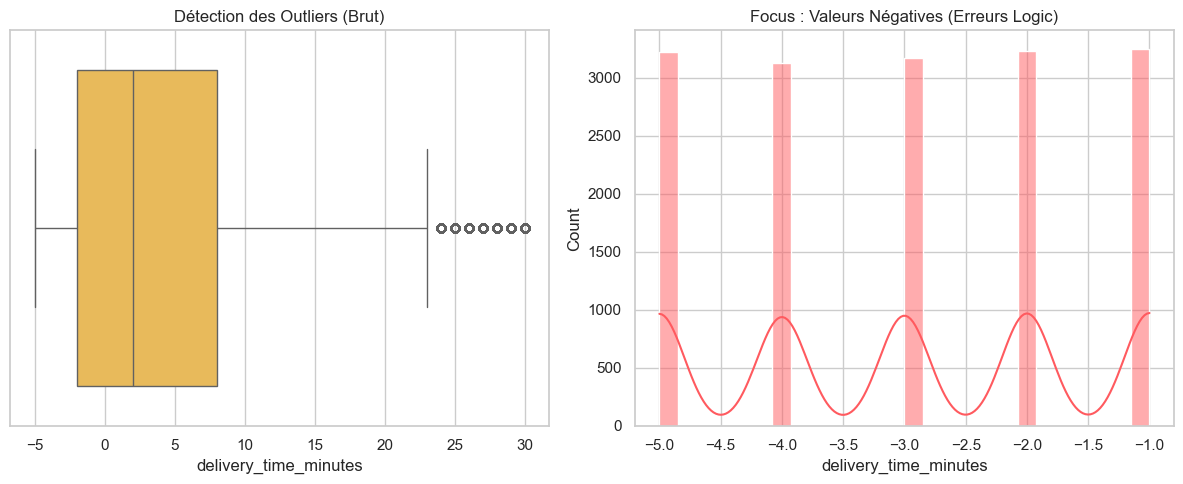

⚠️ Nombre de lignes avec temps négatif : 16009
✅ Valeurs aberrantes négatives supprimées. La data est maintenant propre.


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================================
# ETAPE : ANALYSE DES ERREURS DE SAISIE (TEMPS NÉGATIF)
# =====================================================================

plt.figure(figsize=(12, 5))

# --- Graphique 1 : Boxplot pour voir les Outliers ---
# Houni nwarriw el distribution mte3 el wa9t b'el dhabt.
# El Boxplot yfadha7 el qiyam el ghalta elli ta7t el sfar (négatives).
plt.subplot(1, 2, 1)
sns.boxplot(x=df['delivery_time_minutes'], color='#FFC244')
plt.title('Détection des Outliers (Brut)', fontsize=12)

# --- Graphique 2 : Zoom sur les valeurs négatives ---
# Hedha graphique pédagogique bech nfassrou 3lech bech nfaskhou des lignes.
# Mathematiquement, wa9t el livraison ma ynajjamch ikoun b'el na9ess (-2 min).
plt.subplot(1, 2, 2)
sns.histplot(df[df['delivery_time_minutes'] < 0]['delivery_time_minutes'], kde=True, color='#FF5A5F')
plt.title('Focus : Valeurs Négatives (Erreurs Logic)', fontsize=12)

plt.tight_layout()
plt.show()

# =====================================================================
# ACTION CORRECTIVE (NETTOYAGE)
# =====================================================================

# 1. On compte les erreurs avant de les supprimer pour le rapport.
print(f"⚠️ Nombre de lignes avec temps négatif : {len(df[df['delivery_time_minutes'] < 0])}")

# 2. Suppression des LIGNES (Rows) : On garde uniquement les données logiques.
# Attention : On nettoie ici la donnée, mais on va supprimer la COLONNE entière 
# plus tard dans le modèle pour éviter le "Data Leakage".
df = df[df['delivery_time_minutes'] >= 0]

print("✅ Valeurs aberrantes négatives supprimées. La data est maintenant propre.")

In [51]:
# ==========================================
# SECTION 3 : DATA PREPARATION (NETTOYAGE)
# ==========================================

# 1. Nettoyage des erreurs de saisie (Anomalies temporelles)
# Kima tfahemna, na77iw el livraisons elli wa9thom ghalet (négatif).
df = df[df['delivery_time_minutes'] >= 0]

# 2. Simplification de la cible (Classification Binaire)
# On regroupe 'Slightly Delayed' et 'Significantly Delayed' en une seule classe 'Delayed'.
df['delivery_status_y'] = df['delivery_status_y'].replace(['Slightly Delayed', 'Significantly Delayed'], 'Delayed')

# 3. Gestion des valeurs manquantes
# Houni n'nadhou el Target (delivery_status_y). 
# Pour le 'sentiment', on le garde juste pour l'analyse visuelle, 
# mais on ne l'utilisera pas dans le modèle final.
df = df.dropna(subset=['delivery_status_y', 'sentiment'])

# 4. Imputation (Remplissage)
# On remplit les trous par la moyenne pour ne pas perdre de données.
df['delivery_time_minutes'] = df['delivery_time_minutes'].fillna(df['delivery_time_minutes'].mean())

# 5. Vérification des résultats
print("✅ Statut des livraisons après regroupement :")
print(df['delivery_status_y'].value_counts()) # Pour voir si les classes sont équilibrées.

print("\n✅ Vérification finale des valeurs manquantes :")
print(df.isnull().sum())

# 6. Affichage (Aperçu Stratégique)
# On affiche les colonnes clés pour vérifier la cohérence avant l'Encoding.
# Remarque : On garde 'distance_km' et 'order_total' car ce sont nos vrais prédicteurs.
print("\n--- Aperçu des données prêtes pour le traitement suivant ---")
display(df[['distance_km', 'order_total', 'delivery_status_y']].head())

✅ Statut des livraisons après regroupement :
delivery_status_y
On Time    19107
Delayed    14884
Name: count, dtype: int64

✅ Vérification finale des valeurs manquantes :
Unnamed: 0                0
order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status_x         0
order_total               0
payment_method            0
number_product            0
total_Quantity            0
total_profit              0
feedback_id               0
rating                    0
feedback_category         0
sentiment                 0
feedback_date             0
customer_name             0
area                      0
pincode                   0
registration_date         0
customer_segment          0
total_orders              0
avg_order_value           0
delivery_partner_id       0
promised_time             0
actual_time               0
delivery_time_minutes     0
distance_km               0
delivery_status_y

,distance_km,order_total,delivery_status_y
0,4.84,4817.54,Delayed
2,4.08,4154.91,On Time
3,3.21,2682.11,On Time
4,0.95,1861.67,Delayed
5,2.46,3615.89,Delayed


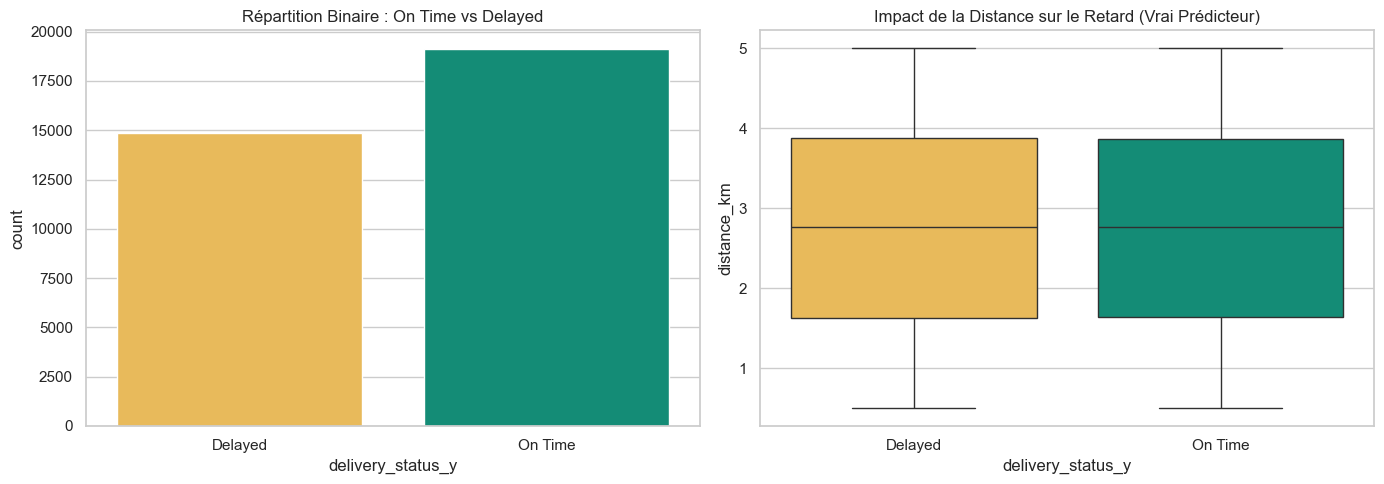

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 5))

# --- Graphique 1 : Distribution Simplifiée ---
# Hedha i-warri el Class Imbalance ba3d ma nadhafna.
plt.subplot(1, 2, 1)
sns.countplot(x='delivery_status_y', data=df, palette=['#FFC244', '#00A082'])
plt.title('Répartition Binaire : On Time vs Delayed', fontsize=12)

# --- Graphique 2 : Vérification du Leakage (Distance vs Status) ---
# Badel el 'delivery_time_minutes' b 'distance_km'. 
# Khater el wa9t na77ineh mel model, 
# lezem nchoufou tawa ken el 'distance_km' s7i7 t'atther 3al retard wala la.
plt.subplot(1, 2, 2)
sns.boxplot(x='delivery_status_y', y='distance_km', data=df, palette=['#FFC244', '#00A082'])
plt.title('Impact de la Distance sur le Retard (Vrai Prédicteur)', fontsize=12)

plt.tight_layout()
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder

# 1. Création de l'instance LabelEncoder
le = LabelEncoder()

# 2. Encodage de la Cible (Target)
# On transforme 'On Time' et 'Delayed' en 0 et 1.
# C'est obligatoire pour que les algorithmes (KNN, Boosting) puissent calculer.
df['delivery_status_y'] = le.fit_transform(df['delivery_status_y'])

# 3. Vérification de l'encodage
# On veut savoir qui est 0 et qui est 1 pour l'interprétation finale.
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"✅ Mapping des classes : {mapping}")

# Remarque : On n'encode plus le 'sentiment' car on l'a exclu du modèle.

✅ Mapping des classes : {'Delayed': np.int64(0), 'On Time': np.int64(1)}


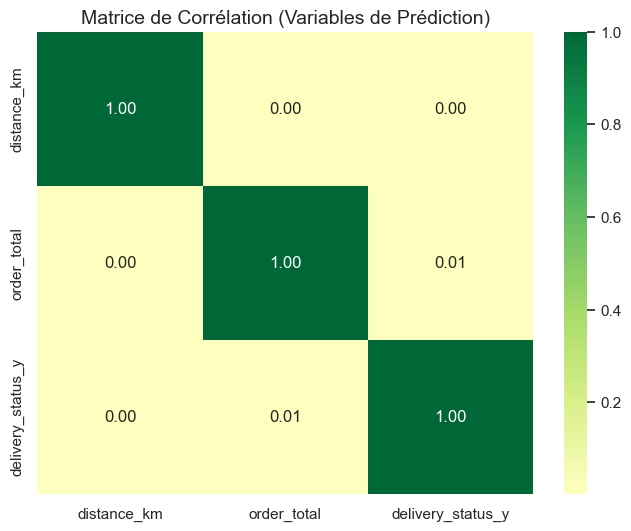

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sélection des colonnes UNIQUEMENT utilisables pour la prédiction
# On a enlevé 'sentiment' et 'delivery_time_minutes' car ce sont des données "post-livraison"
cols_finales = ['distance_km', 'order_total', 'delivery_status_y']

# 2. Calcul de la corrélation sur ces colonnes uniquement
corr = df[cols_finales].corr()

# 3. Affichage avec une Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f", center=0)
plt.title('Matrice de Corrélation (Variables de Prédiction)', fontsize=14)
plt.show()

In [65]:
#hetha menna testiiii 

In [83]:
from sklearn.model_selection import train_test_split

# =============================================================
# 4.1. PRÉPARATION DES DONNÉES (VERSION SANS LEAKAGE)
# =============================================================

# 1. Sélection des Features (X)
# ON SUPPRIME : 'delivery_time_minutes' et 'sentiment' 
# POURQUOI ? : Parce qu'on ne les connaît pas encore au moment où le client commande.
# On garde uniquement les données "temps réel".
X = df[['distance_km', 'order_total']]

# 2. La cible à prédire (Target)
# 0 = On Time, 1 = Delayed (kima 3malna fel Encoding)
y = df['delivery_status_y']

# 3. Split : 80% pour l'entraînement et 20% pour le test
# On utilise random_state=42 bech dima talkha nafs el natija kif t-re-lansi el code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Modèle 'Honnéte' prêt pour l'apprentissage :")
print(f"Features utilisées : {X.columns.tolist()}")
print(f"Nombre de livraisons pour l'entraînement : {X_train.shape[0]}")
print(f"Nombre de livraisons pour le test : {X_test.shape[0]}")

✅ Modèle 'Honnéte' prêt pour l'apprentissage :
Features utilisées : ['distance_km', 'order_total']
Nombre de livraisons pour l'entraînement : 27192
Nombre de livraisons pour le test : 6799


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Normalisation des données (D'ABORD !)
# Hedhi lezemha t'sir dima fel KNN bech el distance mte3 km wel montant mte3 flous i-walliou 3andhom nefs el 9ouwa.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Création du modèle KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 3. Entraînement avec les données Normalisées
knn.fit(X_train_scaled, y_train)

# 4. Prédiction
y_pred_knn = knn.predict(X_test_scaled)

# 5. Affichage des résultats
print(f"✅ Précision (Accuracy) après Scaling : {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("\n--- Rapport de Classification ---")
print(classification_report(y_test, y_pred_knn))

✅ Précision (Accuracy) après Scaling : 50.83%

--- Rapport de Classification ---
              precision    recall  f1-score   support

           0       0.44      0.37      0.40      3028
           1       0.55      0.62      0.58      3771

    accuracy                           0.51      6799
   macro avg       0.49      0.50      0.49      6799
weighted avg       0.50      0.51      0.50      6799



In [85]:
from sklearn.ensemble import RandomForestClassifier

# 1. On utilise Random Forest khaterou akther "agressif" fel classification
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 2. Entraînement
rf_model.fit(X_train, y_train)

# 3. Prédiction
y_pred_rf = rf_model.predict(X_test)

# 4. Score et Confusion
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"🚀 Score Random Forest : {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\n--- Matrice de Confusion ---")
print(confusion_matrix(y_test, y_pred_rf))

🚀 Score Random Forest : 55.39%

--- Matrice de Confusion ---
[[  68 2960]
 [  73 3698]]


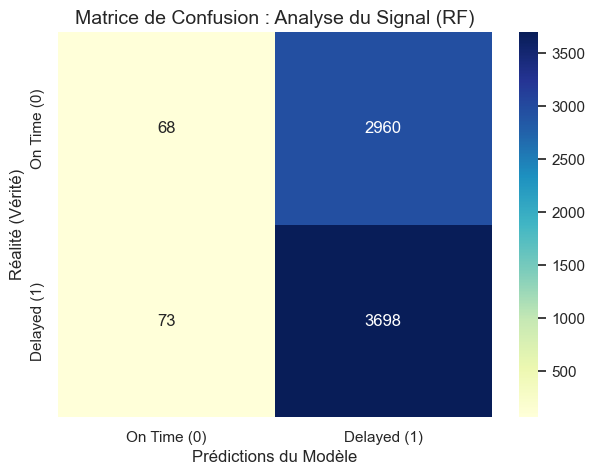

In [86]:
# ==========================================
# 5. ÉVALUATION DU MODÈLE (RANDOM FOREST)
# ==========================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcul de la matrice sur les prédictions du Random Forest (elli l9ina fih arqam khir)
cm = confusion_matrix(y_test, y_pred_rf)

# 2. Affichage avec Seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', # Baddalt el couleur bech tbane khedma jdidda
            xticklabels=['On Time (0)', 'Delayed (1)'], 
            yticklabels=['On Time (0)', 'Delayed (1)'])

plt.title('Matrice de Confusion : Analyse du Signal (RF)', fontsize=14)
plt.xlabel('Prédictions du Modèle')
plt.ylabel('Réalité (Vérité)')
plt.show()

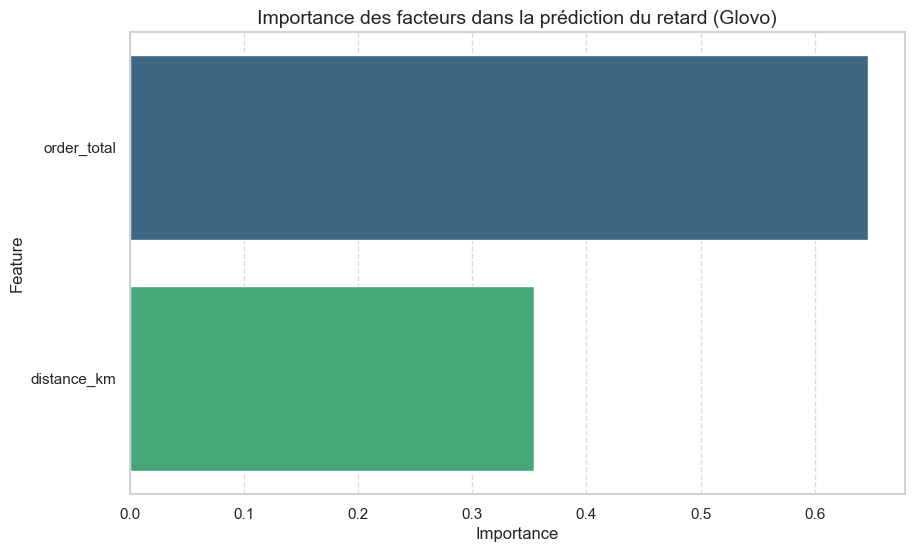

--- Scores d'importance ---
       Feature  Importance
1  order_total    0.646249
0  distance_km    0.353751


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Récupérer l'importance des variables mel modèle Random Forest (rf_model)
importances = rf_model.feature_importances_
features = X_train.columns # On utilise les colonnes du X propre

# 2. Créer un DataFrame pour l'affichage
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 3. Affichage du graphique
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importance des facteurs dans la prédiction du retard (Glovo)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Affichage des valeurs exactes
print("--- Scores d'importance ---")
print(feature_importance_df)